In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
house = pd.read_csv("/content/drive/MyDrive/Raw_Data/real_estate_dataset.csv")
house.head(2)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [6]:
sns.set()

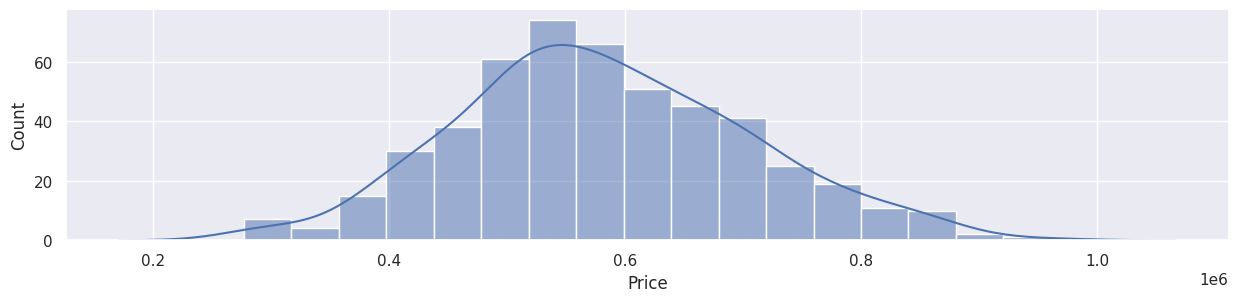

In [7]:
plt.figure(figsize=(15,3))
sns.histplot(house['Price'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

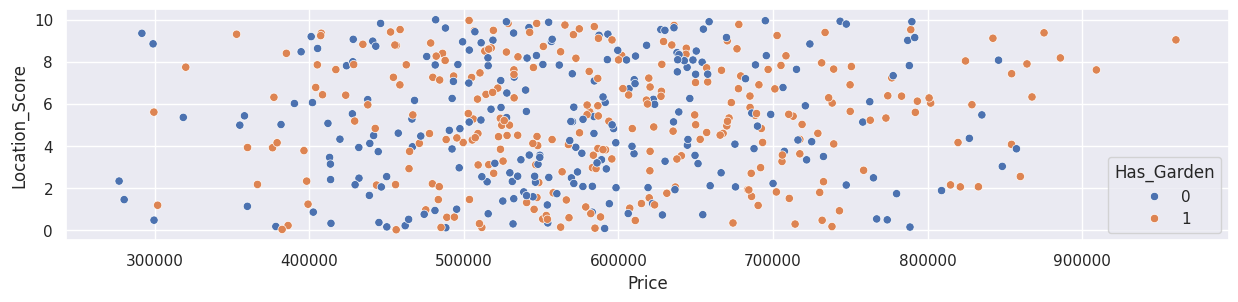

In [9]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=house, x='Price', y='Location_Score', hue='Has_Garden')
plt.show()

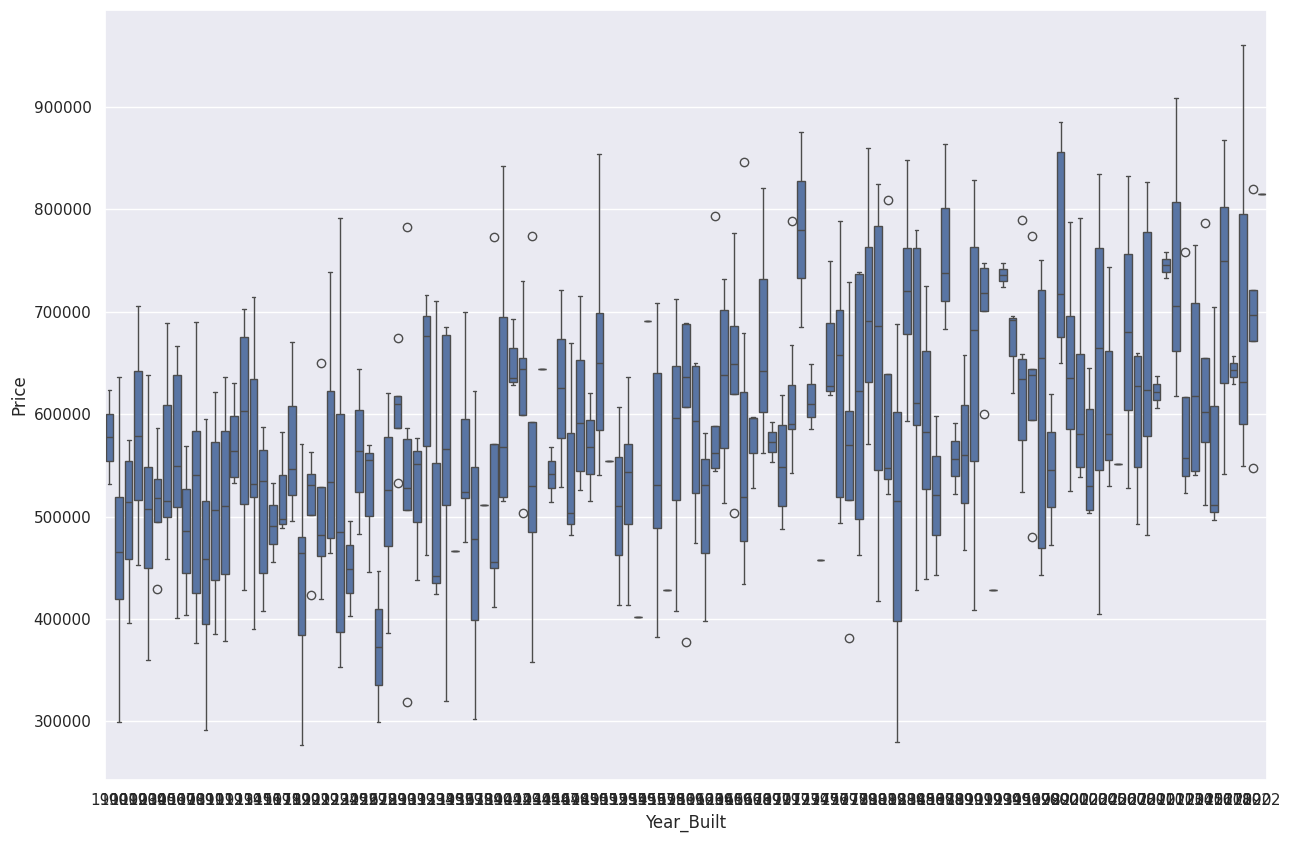

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=house, x='Year_Built', y='Price')
plt.show()

In [18]:
X = house.drop(columns=['ID', 'Price'])
y = house['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
test_pred = rg.predict(X_test)
r2_scr = r2_score(y_test, test_pred)
print(f"r2 score for test is {r2_scr}")

Importance = rg.feature_importances_.round(3)*100
Columns = X.columns
feature_importance = pd.DataFrame({'Feature': Columns,
                                   'Importance': Importance}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance")
print(feature_importance)

r2 score for test is 0.8257310468299106

Feature Importance
              Feature  Importance
0         Square_Feet        37.7
1        Num_Bedrooms        31.8
4          Year_Built        18.6
8      Location_Score         2.9
7         Garage_Size         2.5
9  Distance_to_Center         2.3
2       Num_Bathrooms         1.6
6            Has_Pool         1.3
3          Num_Floors         0.8
5          Has_Garden         0.5


In [32]:
from sklearn.cluster import KMeans

X_Cluster = house.iloc[:,1:11].values

scaler = StandardScaler()
X_Cluster = scaler.fit_transform(X_Cluster)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

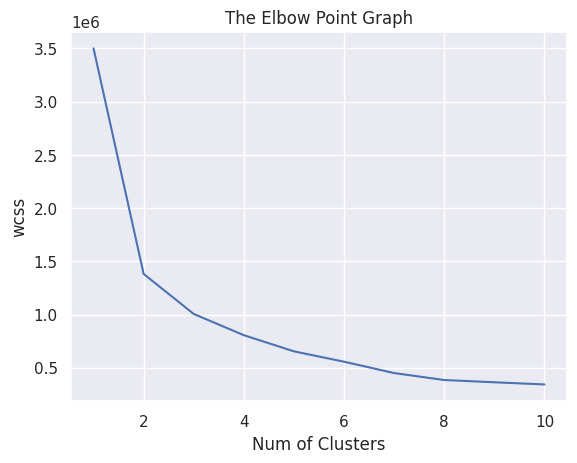

In [33]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Num of Clusters")
plt.ylabel("wcss")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X_Cluster)
print(Y)

[6 0 3 3 4 4 7 5 2 3 3 0 5 5 1 6 2 0 4 5 4 6 0 6 0 7 3 5 0 7 2 6 7 0 0 0 7
 1 2 5 0 3 2 3 3 4 3 2 6 6 0 0 4 0 5 0 5 2 1 2 6 2 5 3 6 6 2 3 6 5 6 2 3 4
 0 2 4 2 1 2 3 3 1 1 0 0 0 7 0 5 1 3 4 5 4 7 4 5 7 3 7 0 1 5 2 5 7 4 7 7 5
 1 7 3 7 7 5 5 7 2 2 1 5 6 5 6 7 1 5 4 4 7 0 2 3 0 5 1 3 0 3 1 2 5 2 6 5 0
 6 7 4 4 1 2 0 0 2 4 5 2 3 1 4 1 6 0 2 1 7 4 7 6 4 0 5 6 3 1 7 1 6 4 0 4 5
 4 1 5 1 3 6 4 4 3 3 1 3 0 1 7 4 5 6 1 6 7 5 1 6 7 1 3 5 6 3 5 3 5 2 0 4 0
 7 3 3 7 7 4 3 2 4 3 3 5 3 3 6 5 0 1 1 2 0 1 5 3 2 2 4 3 2 5 1 5 1 5 4 2 0
 2 4 5 6 5 0 3 3 0 3 5 2 7 3 2 0 6 4 2 3 0 4 1 1 6 5 6 3 4 2 1 1 3 1 5 0 3
 0 7 1 6 5 5 0 1 3 6 0 7 7 1 2 6 7 7 3 0 7 1 3 4 1 0 5 1 4 7 6 0 1 2 6 0 2
 5 3 3 4 4 5 5 4 2 3 1 0 3 6 2 4 6 6 7 3 7 2 6 3 3 5 0 5 1 6 7 5 4 5 4 5 4
 3 7 6 6 2 1 7 2 4 6 6 2 7 2 5 5 4 6 4 2 4 2 1 0 5 1 4 1 4 4 1 3 6 1 3 0 3
 1 1 0 6 1 4 7 1 1 2 5 0 4 5 0 7 2 6 5 6 1 5 1 7 4 7 5 2 3 5 7 2 3 2 1 5 2
 3 1 4 4 0 6 3 0 1 4 5 7 2 4 6 6 3 4 3 6 3 7 5 1 6 3 3 3 6 6 6 1 6 1 0 5 7
 7 4 5 5 1 6 3 1 4 5 3 3 